### 모듈 import

In [1]:
import numpy as np
import pandas as pd

# visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style="white")
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.unicode_minus'] = False    # minus

# interactive
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

### 노트북 세팅

In [2]:
# 노트북 세팅
pd.options.display.float_format = '{:.2f}'.format

## 유니콘 기업 재정의
- 2021년 (누적) 기준으로 유니콘 기업으로 선정된 기업들 중 하기 7개 기업의 국민연금 데이터로 분석 방향을 설정함

### 유니콘 기업으로 선정된 기업 정보 수집 
- 출처 : https://www.data.go.kr/data/3046071/fileData.do
- 수집 대상 기업 : 비바리퍼블리카, 쏘카, 무신사, 크래프톤, 야놀자, 에이프로젠, 지피클럽
- 수집 대상 기간 : 2015-2019년 (매년 12월 데이터)

In [ ]:
unicorn2019 = pd.read_csv("국민연금 가입 사업장 내역 2019년 12월.csv", encoding='cp949')
unicorn2018 = pd.read_csv("국민연금 가입 사업장 내역 2018년 12월.csv", encoding='cp949')
unicorn2017 = pd.read_csv("국민연금 가입 사업장 내역 2017년 12월.csv", encoding='cp949')
unicorn2016 = pd.read_csv("국민연금 가입 사업장 내역 2016년 12월.csv", encoding='cp949')
unicorn2015 = pd.read_csv("국민연금 가입 사업장 내역 2015년 12월.csv", encoding='cp949')

In [ ]:
df_unicorn=pd.DataFrame()
unicorn_list = ['비바리퍼블리카$', '쏘카', '주식회사 무신사', '크래프톤', '.주.야놀자$', '.주.에이프로젠$', '지피클럽']
for i in unicorn_list :
    df_unicorn = df_unicorn.append(unicorn2019[unicorn2019['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2018[unicorn2018['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2017[unicorn2017['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2016[unicorn2016['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])
    df_unicorn = df_unicorn.append(unicorn2015[unicorn2015['사업장명 WKPL_NM\tVARCHAR(100)'].str.contains(i)])

# 불필요한 컬럼 제거 및 인덱스 리셋
df_unicorn.drop(df_unicorn.filter(regex='주소|가입상태|우편번호|등록번호|등록일자|사업장업종코드 WKPL|탈퇴일자|구분코드').columns , axis=1, inplace=True)
df_unicorn = df_unicorn.reset_index().drop('index', axis=1)

# 컬럼명 재지정
unicorn_newcol = ['년월','사업장명','업종', '적용일자', '직원수', '연금보험료', '신규취득자수','상실가입자수' ]
df_unicorn.columns = unicorn_newcol

# 연도, 월 컬럼 생성
df_unicorn[['년도','월']]=pd.DataFrame(df_unicorn['년월'].str.split('-',2).tolist())
df_unicorn.drop(['년월','월'], axis=1, inplace=True)
df_unicorn['년도'] = df_unicorn['년도'].astype('int64')

# 7개 유니콘 기업 기본 정보 (trend 파악용)
df_unicorn.to_csv('유니콘기업정보.csv')

In [187]:
df_unicorn = pd.read_csv('유니콘기업정보.csv').drop('Unnamed: 0', axis=1)
df_unicorn.head()

,사업장명,업종,적용일자,직원수,연금보험료,신규취득자수,상실가입자수,년도
0,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,310,118457320,18,12,2019
1,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,158,57709520,5,3,2018
2,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,103,34070000,5,2,2017
3,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,60,17035140,5,3,2016
4,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,27,6171340,0,2,2015


In [188]:
# 데이터 보유 기간 동일
df_unicorn.groupby('사업장명').count()['년도']

사업장명
(주)야놀자        5
(주)에이프로젠      5
(주)크래프톤       5
주식회사 무신사      5
주식회사쏘카        5
（주）비바리퍼블리카    5
（주）지피클럽       5
Name: 년도, dtype: int64

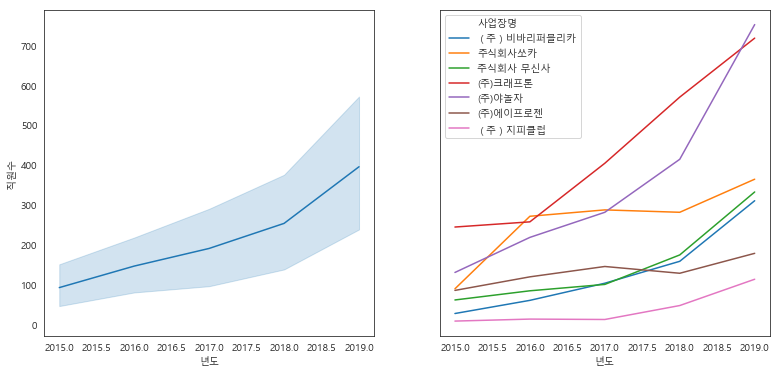

In [189]:
fig, axes = plt.subplots(ncols=2, figsize=(13,6), sharex=True, sharey=True)

sns.lineplot(data = df_unicorn[['사업장명','직원수','년도']], x='년도', y='직원수', ax=axes[0])
sns.lineplot(data = df_unicorn[['사업장명','직원수','년도']], x='년도', y='직원수', hue='사업장명', ax=axes[1])

In [190]:
# plotly
fig = px.line(df_unicorn, x="년도", y="직원수", 
             title='유니콘 기업 연도별 국민연금 가입자 수',
             color='사업장명',
             line_group='사업장명',
             hover_name='사업장명')
fig.update_layout(
    autosize=False,
    width=600,
    height=500)

fig.show()

In [191]:
# 유니콘 기업별 직원수 연성장율 기업가치 파악
df_unicorn_change = pd.DataFrame(df_unicorn.sort_values(['사업장명','년도']).groupby('사업장명')['직원수'].pct_change(periods=1)).rename(columns={'직원수':'성장율_직원수'}).fillna(0)
df_unicorn_change_total = pd.DataFrame(df_unicorn.sort_values(['사업장명','년도']).groupby('사업장명')['직원수'].pct_change(periods=4)).rename(columns={'직원수':'기간내성장율_직원수'}).fillna(0)

df_unicorn = df_unicorn.merge(df_unicorn_change,how='left', right_index=True,left_index=True)
df_unicorn = df_unicorn.merge(df_unicorn_change_total, how='left', right_index=True,left_index=True)

df_unicorn_growth = df_unicorn.groupby('사업장명').agg({'성장율_직원수':'mean'}).rename(columns={'성장율_직원수':'연평균성장율_직원수'})

# valuation 정보 추가
# valuation 정보는 유니콘 기업 선정시 공개자료 활용
df_unicorn_growth['valuation']=list((1,1.04,5,2.2,1,2.6,1.32))

# 유니콘 기업정보 최종 (직원수 - 성장율, 기간내성장율, 연평균성장율, valuation)
df_unicorn = df_unicorn.merge(df_unicorn_growth, on='사업장명', how='left')
df_unicorn.head(1)

,사업장명,업종,적용일자,직원수,연금보험료,신규취득자수,상실가입자수,년도,성장율_직원수,기간내성장율_직원수,연평균성장율_직원수,valuation
0,（주）비바리퍼블리카,응용 소프트웨어 개발 및 공급업,2013-08-01,310,118457320,18,12,2019,0.96,10.48,0.69,2.60


In [52]:
#df_unicorn[df_unicorn['년도']==2019].filter(regex='직원수|valuation|연금보험료').corr()['valuation']

In [192]:
df_unicorn.filter(regex='^직원수|연금보험료|valuation').corr()

,직원수,연금보험료,valuation
직원수,1.00,0.98,0.36
연금보험료,0.98,1.00,0.44
valuation,0.36,0.44,1.00


In [197]:
df_unicorn.filter(regex='성장율').describe().T

,count,mean,std,min,25%,50%,75%,max
성장율_직원수,35.00,0.50,0.63,-0.12,0.00,0.38,0.70,2.92
기간내성장율_직원수,35.00,1.11,2.95,0.00,0.00,0.00,0.00,13.12
연평균성장율_직원수,35.00,0.50,0.25,0.18,0.26,0.45,0.69,0.97


### 데이터 로드

In [223]:
# 원본데이터 nps
nps = pd.read_csv('../company_nps_data.csv', encoding = 'CP949')
df = nps.copy()

In [16]:
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3


### 데이터 개요

In [17]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [18]:
df.columns

Index(['회사ID', '연매출액', '년도', '월', '월별_연금보험료', '월별_직원수'], dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [20]:
df['년도'].describe()   # 2015년 - 2019년

count   99801.00
mean     2016.97
std         0.98
min      2015.00
25%      2016.00
50%      2017.00
75%      2018.00
max      2019.00
Name: 년도, dtype: float64

In [21]:
df['회사ID'].nunique()  # 5000개 회사

5000

In [22]:
df.sort_values(['회사ID','년도','월'])

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
33039,63,11328779396,2018,1,403119840,1006
74251,63,11328779396,2018,2,406770960,1018
80947,63,11328779396,2018,3,404826240,1013
80770,63,11328779396,2018,4,404211800,1012
28110,63,11328779396,2018,5,400339640,1002
...,...,...,...,...,...,...
244,3312354,1451563,2019,9,1312200,3
38757,3312354,1451563,2019,10,1312200,3
49019,3312354,1451563,2019,11,1312200,3
72163,3312354,1451563,2019,12,1312200,3


- 5000개의 회사 데이터
- '회사ID', '연매출액', '년도', '월', '월별_연금보험료', '월별_직원수'
- 대상 기간: 2015년 - 2019년 (회사마다 데이터 보유기간 상이)

### 전처리

In [348]:
df = df.drop(index=df.query('연매출액 < 0').index)
df = df.drop(index=df.query('월별_직원수 == 0').index)

In [350]:
# 1인당 매출액 추가
df.loc[:,'인당_매출액'] = df.loc[:, '연매출액'] / df.loc[:, '월별_직원수']

In [355]:
print('전처리 후 기업 수 :', df['회사ID'].nunique())

전처리 후 기업 수 : 4998


## EDA
**EDA 목적 :유니콘 지수 산출**
>   - 데이터 파악 및 전처리 작업으로 최종 분석 데이터셋 구성
>   - 최종 분석 데이터셋으로 유니콘 지수 산출 (스코어링에 필요한 지표 및 가중치 파악)

In [358]:
# df_eda : 회사ID/년도/월별 sorting 데이터 셋
df_eda = df.sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)
df_eda.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
0,63,11328779396,2018,1,403119840,1006,11261212.12
1,63,11328779396,2018,2,406770960,1018,11128466.99
2,63,11328779396,2018,3,404826240,1013,11183395.26
3,63,11328779396,2018,4,404211800,1012,11194446.04
4,63,11328779396,2018,5,400339640,1002,11306167.06


### 분석대상 필터링


#### 분석대상금액 (연매출액기준)
- 기준 : 연매출액 1000억원 이상
- 근거 : 유니콘 기업들 등재시점 기준 연매출액 1000억원 이상

In [359]:
# 2019년 매출액 정보 있으면서 천억이상이 아닌 기업
sales_list = list(df_eda.query('년도==2019&연매출액<100000000')['회사ID'].unique())
df_eda = df_eda[~df_eda['회사ID'].isin(sales_list)].reset_index().drop('index',axis=1)
print('df_eda shape :', df_eda.shape)
print('raw data 기업 수 :', df['회사ID'].nunique())
print('분석대상금액 필터링 후 기업 수 :', df_eda['회사ID'].nunique())

df_eda shape : (97662, 7)
raw data 기업 수 : 4998
분석대상금액 필터링 후 기업 수 : 4928


데이터 보유기간 1년 이하 기업 수 : 2407


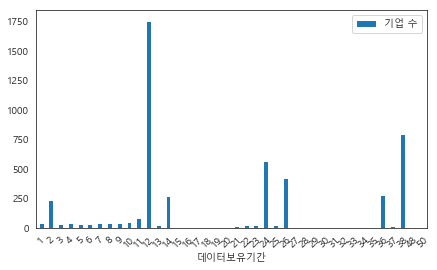

In [449]:
df_periodsize = pd.DataFrame(df_eda.groupby('회사ID').size()).reset_index().rename(columns={0:'데이터보유기간'})
df_periodsize.groupby('데이터보유기간').count().rename(columns={'회사ID':'기업 수'}).plot.bar(rot=45, figsize=(7,4))
print('데이터 보유기간 1년 이하 기업 수 :', df_periodsize.query('데이터보유기간<=12')['회사ID'].nunique())

#### 분석대상기간 (1년이하)
- 기준 : 데이터 기간 1년 이하
- 근거 : 

**데이터기간 1년이하인 기업들 중 높은 직원성장율을 보이는 곳이 있는지 파악하고자 함**

In [450]:
# 1년 이하의 데이터만 존재하는 기업 데이터 셋
less_list = df_periodsize.query('데이터보유기간<=12')['회사ID'].to_list()
df_less = df_eda[df_eda['회사ID'].isin(less_list)].sort_values(['회사ID','년도','월']).reset_index()

# 시작 시점 (기준시점)
df_less_start = df_less[df_less['index'].isin(list(df_less.groupby('회사ID').agg({'index':'min'})['index']))]
df_less_start = df_less_start.drop('index', axis=1).rename(columns={'월별_연금보험료': '기준_연금보험료',
                                                                  '월별_직원수':'기준_직원수',
                                                                  '연매출액':'기준_연매출액',
                                                                  '년도' :'기준_년도',
                                                                  '월':'기준_월',
                                                                     '인당_매출액':'기준_인당매출액'})
# 마지막 시점 (비교시점)
df_less_end = df_less[df_less['index'].isin(list(df_less.groupby('회사ID').agg({'index':'max'})['index']))]
df_less_end = df_less_end.drop('index', axis=1).rename(columns={'월별_연금보험료': '비교_연금보험료',
                                                              '월별_직원수':'비교_직원수',         
                                                              '연매출액':'비교_연매출액',
                                                              '년도' :'비교_년도',  
                                                              '월':'비교_월',
                                                               '인당_매출액':'비교_인당매출액'})
#merge전 shape 체크
#print(df_less_start.shape)
#print(df_less_end.shape)

# 1년 이하 기업들의 기간내 성장율, 증감 파악
df_less_growth = df_less_start.merge(df_less_end, on='회사ID', how='inner')

# 지표별 기간내 성장율 변수 추가
df_less_growth['성장율_연금보험료'] = (df_less_growth['비교_연금보험료']-df_less_growth['기준_연금보험료'])/df_less_growth['기준_연금보험료']
df_less_growth['성장율_직원수'] = (df_less_growth['비교_직원수']-df_less_growth['기준_직원수'])/df_less_growth['기준_직원수']
# 대상기간이 1년보다 짧기 때문에 0일 가능성 높음
df_less_growth['성장율_연매출액'] = (df_less_growth['비교_연매출액']-df_less_growth['기준_연매출액'])/df_less_growth['기준_연매출액']
df_less_growth.head(1) 

# 지표별 기간내 증감 변수 추가
df_less_growth['증감_연금보험료'] = (df_less_growth['비교_연금보험료']-df_less_growth['기준_연금보험료'])
df_less_growth['증감_직원수'] = (df_less_growth['비교_직원수']-df_less_growth['기준_직원수'])
# 대상기간이 1년보다 짧기 때문에 0일 가능성 높음
df_less_growth['증감_연매출액'] = (df_less_growth['비교_연매출액']-df_less_growth['기준_연매출액'])

In [451]:
# 유니콘 기업 연평균 직원성장율 중위값 (0.18) 기준으로 높은 직원성장율 보인 곳 
print(df_less_growth.query('성장율_직원수>=0.45')['회사ID'].count())
df_less_growth.query('성장율_직원수>=0.45')

255


,회사ID,기준_연매출액,기준_년도,기준_월,기준_연금보험료,기준_직원수,기준_인당매출액,비교_연매출액,비교_년도,비교_월,비교_연금보험료,비교_직원수,비교_인당매출액,성장율_연금보험료,성장율_직원수,성장율_연매출액,증감_연금보험료,증감_직원수,증감_연매출액
9,1125,53713870,2018,1,11197120,42,1278901.67,53713870,2018,12,43293280,137,392072.04,2.87,2.26,0.00,32096160,95,0
11,1807,5631138,2018,1,8205240,47,119811.45,5631138,2018,12,17526500,92,61208.02,1.14,0.96,0.00,9321260,45,0
19,3611,3955788,2018,1,301680,3,1318596.00,3955788,2018,12,5530120,38,104099.68,17.33,11.67,0.00,5228440,35,0
24,5202,90027705,2018,1,8594100,27,3334359.44,90027705,2018,12,15087700,45,2000615.67,0.76,0.67,0.00,6493600,18,0
28,6438,3770065,2018,1,2212900,19,198424.47,3770065,2018,12,5160360,34,110884.26,1.33,0.79,0.00,2947460,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,635082,36069908,2018,1,29336740,139,259495.74,36069908,2018,12,50945840,254,142007.51,0.74,0.83,0.00,21609100,115,0
2390,782086,3845136,2018,9,1219300,5,769027.20,3845136,2018,12,1395000,8,480642.00,0.14,0.60,0.00,175700,3,0
2395,900163,836891,2018,2,442800,3,278963.67,836891,2018,12,916460,6,139481.83,1.07,1.00,0.00,473660,3,0
2396,918661,258590,2018,1,332900,3,86196.67,258590,2018,12,867140,6,43098.33,1.60,1.00,0.00,534240,3,0


In [345]:
df_less_growth.query('성장율_직원수>=0.45').describe().filter(regex='성장율').T

,count,mean,std,min,25%,50%,75%,max
성장율_연금보험료,258.00,inf,NaN,-0.01,0.58,0.82,1.27,inf
성장율_직원수,258.00,inf,NaN,0.47,0.60,0.73,1.00,inf
성장율_연매출액,258.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [342]:
df_unicorn.filter(regex='성장율').describe().T

,count,mean,std,min,25%,50%,75%,max
성장율_직원수,35.00,0.50,0.63,-0.12,0.00,0.38,0.70,2.92
기간내성장율_직원수,35.00,1.11,2.95,0.00,0.00,0.00,0.00,13.12
연평균성장율_직원수,35.00,0.50,0.25,0.18,0.26,0.45,0.69,0.97


**데이터 기간 1년 이하인 기업들(2407개) 중 직원성장율 0.45 이상 기업**

In [452]:
# 유니콘 기업의 직원 수 연평균성장율 0.4 이상인 기업 
print('유니콘 기업의 직원 수 연평균성장율 0.45 이상인 기업 :', df_unicorn.query('연평균성장율_직원수>=0.45')['사업장명'].nunique())
print(df_unicorn.query('연평균성장율_직원수>=0.45')['사업장명'].unique())

유니콘 기업의 직원 수 연평균성장율 0.45 이상인 기업 : 4
['（주）비바리퍼블리카' '주식회사쏘카' '(주)야놀자' '（주）지피클럽']


**높은 직원 성장율을 보인 상기 기업을 제외한 데이터1년이하 기업 필터링**

In [472]:
print('raw data 기업 수 :', df['회사ID'].nunique())
print('분석대상금액 필터링 후 기업 수 :', df_eda['회사ID'].nunique())
# df_eda_filtered :매출액 1000억 기준, 데이터기간 1년 기준 필터링 후 데이터 셋
df_eda_filtered_less = df_eda[~df_eda['회사ID'].isin(df_less_growth.query('성장율_직원수<=0.45')['회사ID'].to_list())].reset_index().drop('index', axis=1)
print('분석대상금액 필터링 후 기업 수 :', df_eda_filtered['회사ID'].nunique())

raw data 기업 수 : 4998
분석대상금액 필터링 후 기업 수 : 4928
분석대상금액 필터링 후 기업 수 : 2776


**df_eda_filtered_less : 분석대상, 분석기간 필터링 후 데이터셋**
- 2776개의 기업
- 2019년 데이터 있는 경우, 연매출액 1000억 이상
- 데이터 기간 1년 이하인 경우 직원수 성장율 0.45이상

#### 성장율 분석 데이터셋

In [634]:
df_eda_filtered = df_eda[~df_eda['회사ID'].isin(less_list)].sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)
df_eda_filtered.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
0,44851,939238,2016,1,1181140,8,117404.75
1,44851,939238,2016,2,1181140,8,117404.75
2,44851,939238,2016,3,1181140,8,117404.75
3,44851,939238,2016,4,1073140,7,134176.86
4,44851,939238,2016,5,914020,6,156539.67


**df_eda_filtered : 분석대상, 분석기간 필터링 후 데이터셋**
- 2776개의 기업
- 2019년 데이터 있는 경우, 연매출액 1000억 이상
- 데이터 기간 1년 초과 

### 연성장율
> - 회사 ID별로 데이터 기간 상이하나, **회사 ID별 연평균 (연금보험료/직원수/연매출액)성장율을 파악하고자 함**

In [635]:
df_eda_filtered=df_eda_filtered.sort_values(['회사ID','년도','월']).reset_index().drop('index', axis=1)

In [636]:
# df_eda_filtered.info()
df_eda_filtered=df_eda_filtered.astype({'회사ID':str, '년도':str,'월':str})
df_eda_filtered['key'] = df_eda_filtered['회사ID']+"-"+df_eda_filtered['년도']
df_eda_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73191 entries, 0 to 73190
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사ID      73191 non-null  object 
 1   연매출액      73191 non-null  int64  
 2   년도        73191 non-null  object 
 3   월         73191 non-null  object 
 4   월별_연금보험료  73191 non-null  int64  
 5   월별_직원수    73191 non-null  int64  
 6   인당_매출액    73191 non-null  float64
 7   key       73191 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.5+ MB


In [637]:
df_eda_filtered = df_eda_filtered.sort_values('key').groupby('key').agg({'연매출액':'mean',
                                                      '월별_연금보험료':'mean',
                                                      '월별_직원수':'mean',
                                                      '인당_매출액':'mean'}).rename(columns = {'월별_연금보험료':'월평균_연금보험료',
                                                      '월별_직원수':'월평균_직원수',
                                                      '인당_매출액':'월평균_인당매출액'})
df_eda_filtered

,연매출액,월평균_연금보험료,월평균_직원수,월평균_인당매출액
key,,,,
122968-2015,37415377,18450900.00,88.00,425174.74
122968-2016,26858719,16430790.00,76.17,353555.74
122968-2017,32997924,15862956.67,71.25,464383.68
122968-2018,31514468,14128585.00,66.50,474796.36
122983-2015,24179108,12619720.00,63.50,380796.96
...,...,...,...,...
516653-2018,1500046,549920.00,4.22,375011.50
59533-2015,194704,450440.00,5.00,38940.80
59533-2016,207762,540845.00,5.92,35204.12


In [640]:
df_eda_filtered['회사ID']=pd.DataFrame(df_eda_filtered.reset_index()['key'].str.split('-',2).tolist())[0].tolist()
df_eda_filtered

,연매출액,월평균_연금보험료,월평균_직원수,월평균_인당매출액,회사ID
key,,,,,
122968-2015,37415377,18450900.00,88.00,425174.74,122968
122968-2016,26858719,16430790.00,76.17,353555.74,122968
122968-2017,32997924,15862956.67,71.25,464383.68,122968
122968-2018,31514468,14128585.00,66.50,474796.36,122968
122983-2015,24179108,12619720.00,63.50,380796.96,122983
...,...,...,...,...,...
516653-2018,1500046,549920.00,4.22,375011.50,516653
59533-2015,194704,450440.00,5.00,38940.80,59533
59533-2016,207762,540845.00,5.92,35204.12,59533


In [619]:
df_eda_filtered = df_eda_filtered.reset_index()

In [642]:
df_growth = df_eda_filtered.groupby('회사ID').pct_change()
df_growth.head()

,연매출액,월평균_연금보험료,월평균_직원수,월평균_인당매출액
key,,,,
122968-2015,NaN,NaN,NaN,NaN
122968-2016,-0.28,-0.11,-0.13,-0.17
122968-2017,0.23,-0.03,-0.06,0.31
122968-2018,-0.04,-0.11,-0.07,0.02
122983-2015,NaN,NaN,NaN,NaN


In [659]:
df_growth.head(20)

,연매출액,월평균_연금보험료,월평균_직원수,월평균_인당매출액
key,,,,
122968-2015,NaN,NaN,NaN,NaN
122968-2016,-0.28,-0.11,-0.13,-0.17
122968-2017,0.23,-0.03,-0.06,0.31
122968-2018,-0.04,-0.11,-0.07,0.02
122983-2015,NaN,NaN,NaN,NaN
122983-2016,-0.16,-0.03,-0.07,-0.09
122983-2017,-0.53,-0.33,-0.35,-0.20
123082-2016,NaN,NaN,NaN,NaN
123082-2017,-0.02,-0.05,-0.10,0.09


In [ ]:
회사별 유니콘 지수 = ax1 + bx2 + cx3

In [646]:
df_growth.describe().T

,count,mean,std,min,25%,50%,75%,max
연매출액,4959.00,0.33,4.77,-1.00,-0.12,0.05,0.27,289.97
월평균_연금보험료,4959.00,0.11,0.41,-0.83,-0.04,0.05,0.17,12.02
월평균_직원수,4959.00,0.05,0.38,-0.88,-0.08,0.00,0.11,12.57
월평균_인당매출액,4959.00,0.32,5.03,-1.00,-0.12,0.04,0.26,262.39


In [653]:
px.box(df_growth.query('월평균_직원수>0.11').filter(regex='보험료|매출액'))

In [658]:
df_growth.query('월평균_직원수>=0.28')

,연매출액,월평균_연금보험료,월평균_직원수,월평균_인당매출액
key,,,,
123882-2017,2.61,0.29,0.29,1.84
124181-2017,-0.20,0.40,0.28,-0.37
125984-2018,0.83,0.35,0.30,0.41
126282-2016,0.51,0.28,0.33,0.14
126772-2016,0.02,0.40,0.48,-0.29
...,...,...,...,...
487687-2016,-0.24,0.29,0.31,-0.42
490685-2016,5.12,1.44,1.49,1.30
507625-2016,3.06,0.23,0.32,2.17


In [657]:
df_growth.query('월평균_직원수>=0.28').describe().T

,count,mean,std,min,25%,50%,75%,max
연매출액,498.00,1.43,13.19,-1.00,0.04,0.33,0.86,289.97
월평균_연금보험료,498.00,0.82,0.93,0.05,0.39,0.54,0.90,12.02
월평균_직원수,498.00,0.71,0.88,0.28,0.34,0.47,0.73,12.57
월평균_인당매출액,498.00,0.55,9.21,-1.00,-0.34,-0.12,0.18,202.68


In [529]:
df_eda_filtered[df_eda_filtered['index'].isin(list(df_eda_filtered.groupby(['회사ID','년도']).agg({'index':'max'})['index']))]

,index,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,인당_매출액
11,11,44851,939238,2016,12,1318740,6,156539.67
23,23,44851,1189946,2018,12,790620,4,297486.50
25,25,59533,194704,2015,12,450440,5,38940.80
37,37,59533,207762,2016,12,552500,6,34627.00
49,49,59533,124299,2017,12,453200,5,24859.80
...,...,...,...,...,...,...,...,...
73155,73155,516607,2586020,2016,12,355300,3,862006.67
73157,73157,516607,1959259,2018,2,349560,3,653086.33
73169,73169,516653,1745520,2016,12,449260,4,436380.00
73181,73181,516653,1956460,2017,12,594160,5,391292.00


In [530]:
# 연초
df_growth_start = df_eda_filtered[df_eda_filtered['index'].isin(list(df_eda_filtered.groupby(['회사ID','년도']).agg({'index':'min'})['index']))]
df_growth_start = df_growth_start.drop('index', axis=1).rename(columns={'월별_연금보험료': '기준_연금보험료',
                                                                      '월별_직원수':'기준_직원수',
                                                                      '연매출액':'기준_연매출액',
                                                                      '월':'기준_월',
                                                                       '인당_매출액':'기준_인당매출액'})
# 연말
df_growth_end=df_eda_filtered[df_eda_filtered['index'].isin(list(df_eda_filtered.groupby(['회사ID','년도']).agg({'index':'max'})['index']))]
df_growth_end = df_growth_end.drop('index', axis=1).rename(columns={'월별_연금보험료': '비교_연금보험료',
                                                                  '월별_직원수':'비교_직원수',         
                                                                  '연매출액':'비교_연매출액', 
                                                                  '월':'비교_월',
                                                                '인당_매출액':'비교_인당매출액'})
print(df_growth_start.shape)
print(df_growth_end.shape)

(7480, 7)
(7480, 7)


In [531]:
df_growth=df_growth_start.merge(df_growth_end, on=['회사ID','년도'], how='inner').sort_values(['회사ID','년도'])

In [532]:
df_growth=df_growth_start.merge(df_growth_end, on=['회사ID','년도'], how='inner').sort_values(['회사ID','년도'])

# 지표별 기간내 성장율 변수 추가
df_growth['성장율_연금보험료'] = (df_growth['비교_연금보험료']-df_growth['기준_연금보험료'])/df_growth['기준_연금보험료']
df_growth['성장율_직원수'] = (df_growth['비교_직원수']-df_growth['기준_직원수'])/df_growth['기준_직원수']
df_growth['성장율_연매출액'] = (df_growth['비교_연매출액']-df_growth['기준_연매출액'])/df_growth['기준_연매출액']
df_growth['성장율_인당매출액'] = (df_growth['비교_인당매출액']-df_growth['기준_인당매출액'])/df_growth['기준_인당매출액']

# 지표별 기간내 증감 변수 추가
df_growth['증감_연금보험료'] = (df_growth['비교_연금보험료']-df_growth['기준_연금보험료'])
df_growth['증감_직원수'] = (df_growth['비교_직원수']-df_growth['기준_직원수'])
df_growth['증감_연매출액'] = (df_growth['비교_연매출액']-df_growth['기준_연매출액'])
df_growth['증감_인당매출액'] = (df_growth['비교_인당매출액']-df_growth['기준_인당매출액'])

In [533]:
df_growth

,회사ID,기준_연매출액,년도,기준_월,기준_연금보험료,기준_직원수,기준_인당매출액,비교_연매출액,비교_월,비교_연금보험료,비교_직원수,비교_인당매출액,성장율_연금보험료,성장율_직원수,성장율_연매출액,성장율_인당매출액,증감_연금보험료,증감_직원수,증감_연매출액,증감_인당매출액
0,44851,939238,2016,1,1181140,8,117404.75,939238,12,1318740,6,156539.67,0.12,-0.25,0.00,0.33,137600,-2,0,39134.92
1,44851,1189946,2018,1,925920,4,297486.50,1189946,12,790620,4,297486.50,-0.15,0.00,0.00,0.00,-135300,0,0,0.00
2,59533,194704,2015,11,450440,5,38940.80,194704,12,450440,5,38940.80,0.00,0.00,0.00,0.00,0,0,0,0.00
3,59533,207762,2016,1,450440,5,41552.40,207762,12,552500,6,34627.00,0.23,0.20,0.00,-0.17,102060,1,0,-6925.40
4,59533,124299,2017,1,552500,6,20716.50,124299,12,453200,5,24859.80,-0.18,-0.17,0.00,0.20,-99300,-1,0,4143.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7475,516607,2586020,2016,1,380060,3,862006.67,2586020,12,355300,3,862006.67,-0.07,0.00,0.00,0.00,-24760,0,0,0.00
7476,516607,1959259,2018,1,349560,3,653086.33,1959259,2,349560,3,653086.33,0.00,0.00,0.00,0.00,0,0,0,0.00
7477,516653,1745520,2016,1,413260,4,436380.00,1745520,12,449260,4,436380.00,0.09,0.00,0.00,0.00,36000,0,0,0.00
7478,516653,1956460,2017,1,449260,4,489115.00,1956460,12,594160,5,391292.00,0.32,0.25,0.00,-0.20,144900,1,0,-97823.00


In [535]:
df_growth.filter(regex='회사ID|년도|성장|증감')

,회사ID,년도,성장율_연금보험료,성장율_직원수,성장율_연매출액,성장율_인당매출액,증감_연금보험료,증감_직원수,증감_연매출액,증감_인당매출액
0,44851,2016,0.12,-0.25,0.00,0.33,137600,-2,0,39134.92
1,44851,2018,-0.15,0.00,0.00,0.00,-135300,0,0,0.00
2,59533,2015,0.00,0.00,0.00,0.00,0,0,0,0.00
3,59533,2016,0.23,0.20,0.00,-0.17,102060,1,0,-6925.40
4,59533,2017,-0.18,-0.17,0.00,0.20,-99300,-1,0,4143.30
...,...,...,...,...,...,...,...,...,...,...
7475,516607,2016,-0.07,0.00,0.00,0.00,-24760,0,0,0.00
7476,516607,2018,0.00,0.00,0.00,0.00,0,0,0,0.00
7477,516653,2016,0.09,0.00,0.00,0.00,36000,0,0,0.00
7478,516653,2017,0.32,0.25,0.00,-0.20,144900,1,0,-97823.00


In [544]:
df_growth.filter(regex='성장율_직원수|연매출액|기준_연매출액|').describe().T

,count,mean,std,min,25%,50%,75%,max
기준_연매출액,7480.00,35645158.21,302077624.08,1364.00,1733149.00,4373875.00,12055853.75,10058868796.00
비교_연매출액,7480.00,35645158.21,302077624.08,1364.00,1733149.00,4373875.00,12055853.75,10058868796.00
성장율_직원수,7480.00,0.05,0.41,-0.98,-0.07,0.00,0.10,14.00
성장율_연매출액,7480.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
증감_연매출액,7480.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [662]:
#px.box(df_growth.query('성장율_직원수<0').filter(regex='기준_연매출액|비교_연매출액'))

**직원 수 성장율 분포 기준으로 그룹핑하여 파악**

In [661]:
#px.box(df_growth.query('성장율_직원수>0.10').filter(regex='기준_연매출액|비교_연매출액'))

In [660]:
#px.box(df_growth.query('성장율_직원수<0.69&성장율_직원수>=0.45').filter(regex='연매출액'))

In [485]:
df_growth.filter(regex='회사ID|년도|성장')[df_growth.filter(regex='회사ID|년도|성장')['회사ID']==128174]

,회사ID,년도,성장율_연금보험료,성장율_직원수,성장율_연매출액,성장율_인당매출액
310,128174,2015,0.02,0.01,0.00,-0.01
311,128174,2016,0.00,-0.06,0.00,0.06
312,128174,2017,-0.05,-0.11,0.00,0.12
313,128174,2018,-0.15,-0.22,0.00,0.28
314,128174,2019,0.16,0.08,0.00,-0.07


#### 마이너스 성장

In [78]:
# 증감 (매출액) 마이너스 제외 0개
drop_list2 = list(df_growth[df_growth['증감_연매출액']<0]['회사ID'])
df_eda = df_eda[~df_eda['회사ID'].isin(drop_list2)].sort_values(['회사ID','년도','월'])
print(df_eda.shape)
print('세부 분석 대상 기업 :', df_eda['회사ID'].nunique())

(99762, 6)
세부 분석 대상 기업 : 4961


In [79]:
df_eda = df_eda.merge(df_growth.filter(regex='회사ID|성장율|증감'), on='회사ID', how='left')
df_eda.head(3)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,성장율_연금보험료,성장율_직원수,성장율_연매출액,증감_연금보험료,증감_직원수,증감_연매출액
0,63,11328779396,2018,1,403119840,1006,0.05,0.02,0.00,19614320,23,0
1,63,11328779396,2018,2,406770960,1018,0.05,0.02,0.00,19614320,23,0
2,63,11328779396,2018,3,404826240,1013,0.05,0.02,0.00,19614320,23,0


In [119]:
df_eda.filter(regex='회사ID|성장율|증감').groupby('회사ID').agg({'성장율_연금보험료':'mean','성장율_직원수':'mean', '성장율_연매출액' : 'mean',
                                                        '증감_연금보험료':'mean','증감_직원수':'mean', '증감_연매출액' : 'mean' })

,성장율_연금보험료,성장율_직원수,성장율_연매출액,증감_연금보험료,증감_직원수,증감_연매출액
회사ID,,,,,,
63,0.05,0.02,0.00,19614320,23,0
95,0.05,0.08,0.00,10081520,40,0
102,0.06,0.09,0.00,9907900,63,0
295,0.33,0.36,0.00,23451220,84,0
414,0.09,0.02,0.00,6952600,6,0
...,...,...,...,...,...,...
1949405,0.24,0.67,0.00,278100,2,0
2329349,5.74,5.00,0.00,4037400,15,0
2400284,1.89,1.33,0.00,1036520,4,0


##### ?
- 분석 대상 기업 선정시 데이터 보유 기간 고려 필요해보임
- 성장율 지표 계산방법?

#### 매출액

#### 직원수

### 데이터 보유기간 
- 데이터 보유 기간이 길면, 인지도popularity 가 높지 않을까 ?
- 데이터 보유 기간과 지표들간의 관계?

In [82]:
df_eda = df_eda.merge(df_periodsize, on='회사ID', how='left')
df_eda

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,성장율_연금보험료,성장율_직원수,성장율_연매출액,증감_연금보험료,증감_직원수,증감_연매출액,데이터보유기간
0,63,11328779396,2018,1,403119840,1006,0.05,0.02,0.00,19614320,23,0,12
1,63,11328779396,2018,2,406770960,1018,0.05,0.02,0.00,19614320,23,0,12
2,63,11328779396,2018,3,404826240,1013,0.05,0.02,0.00,19614320,23,0,12
3,63,11328779396,2018,4,404211800,1012,0.05,0.02,0.00,19614320,23,0,12
4,63,11328779396,2018,5,400339640,1002,0.05,0.02,0.00,19614320,23,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,3312354,1451563,2019,8,1312200,3,0.00,0.00,0.00,0,0,0,5
99758,3312354,1451563,2019,9,1312200,3,0.00,0.00,0.00,0,0,0,5
99759,3312354,1451563,2019,10,1312200,3,0.00,0.00,0.00,0,0,0,5
99760,3312354,1451563,2019,11,1312200,3,0.00,0.00,0.00,0,0,0,5


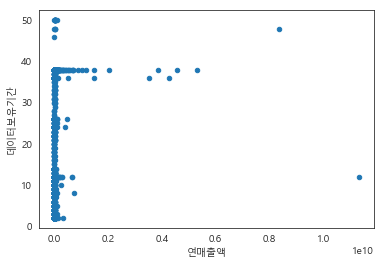

In [129]:
df_eda.groupby('회사ID').agg({'연매출액':'mean','월별_직원수':'mean', '월별_연금보험료' : 'mean','데이터보유기간':'mean'}).plot.scatter(x='연매출액',y='데이터보유기간', figsize=(6,4))

- 연관성 없음 ! 

### 연도별

In [463]:
df_sales = df.groupby(['회사ID','년도']).agg({'연매출액':'mean','월별_직원수':'mean', '월별_연금보험료' : 'mean'}).reset_index()
df_sales.rename(columns={'월별_직원수':'월평균_직원수', '월별_연금보험료':'월평균_연금보험료'}, inplace=True)
df_sales.head()

,회사ID,년도,연매출액,월평균_직원수,월평균_연금보험료
0,63,2018,11328779396,1007.17,410128228.33
1,102,2018,742658938,752.12,173769522.50
2,597,2018,208141595,178.83,54797751.67
3,786,2018,65514573,167.42,46053843.33
4,917,2018,42843708,148.67,48111878.33


In [464]:
df_year = pd.DataFrame(df_sales.value_counts('회사ID')).reset_index().rename(columns={0:'연수'})
df_year.head()

,회사ID,연수
0,135668,5
1,404192,5
2,296819,5
3,14271,5
4,442467,5


<AxesSubplot:>

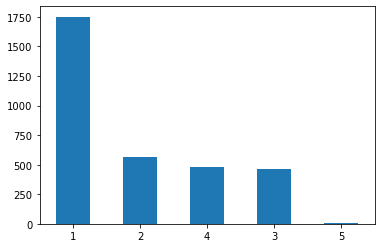

In [465]:
df_year['연수'].value_counts().plot.bar(rot=0)

- 데이터셋에 기간편차 존재 : 회사마다 데이터 기간이 상이함
- 1개년치 데이터만 보유한 기업이 50%

In [466]:
df_year= df_year.merge(df_sales.groupby('회사ID').agg({'연매출액':'mean', 
                                            '월평균_직원수':'mean',
                                            '월평균_연금보험료':'mean'}
                                          ).reset_index().rename(columns={'연매출액':'연평균_매출액',
                                                                         '월평균_직원수':'연평균_직원수',
                                                                         '월평균_연금보험료':'연평균_연금보험료'}),
              how='inner', on='회사ID')
df_year.head()

,회사ID,연수,연평균_매출액,연평균_직원수,연평균_연금보험료
0,135668,5,22746407.60,32.95,9118156.67
1,404192,5,6817502.80,86.88,22606934.67
2,296819,5,13545635.20,47.55,15822334.00
3,14271,5,5578039.80,17.45,3886142.33
4,442467,5,24874211.20,32.38,7048736.67


In [467]:
df_year['1인당연평균매출액']=df_year['연평균_매출액']/df_year['연평균_직원수']
df_year.head()

,회사ID,연수,연평균_매출액,연평균_직원수,연평균_연금보험료,1인당연평균매출액
0,135668,5,22746407.60,32.95,9118156.67,690331.03
1,404192,5,6817502.80,86.88,22606934.67,78467.33
2,296819,5,13545635.20,47.55,15822334.00,284871.40
3,14271,5,5578039.80,17.45,3886142.33,319658.44
4,442467,5,24874211.20,32.38,7048736.67,768117.69


- 직원 수가 감소한 곳은 분석 대상에서 제외

In [189]:
df.groupby(['회사ID','년도','월']).

<AxesSubplot:>

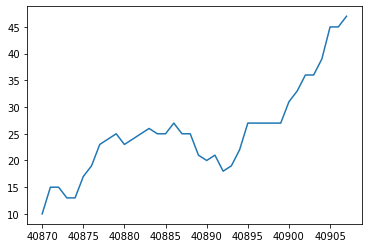

In [479]:
sns.lineplot(data=df, x='df[df['회사ID']==233757]['월별_직원수'].plot.line()

<AxesSubplot:xlabel='연평균_연금보험료', ylabel='연평균_직원수'>

C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GU844RW\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54744 mi

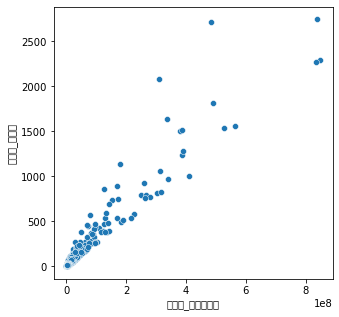

In [308]:
plt.figure(figsize =(5,5))
sns.scatterplot(data = df_year, x='연평균_연금보험료',y='연평균_직원수')

- 직원수와 연금보험료 거의 동일

#### 데이터 보유기간별 회사 추이 파악

## 유니콘 기업 지수 (스코어링) 산출 방향성
1. 직원수로 class 구분 
2. 스코어링 지표 1-5점 척도
> - 1인당 매출액
> - 연성장율_연금보험료
> - 연성장율_직원수
> - 연성장율_매출액
> - 최대최소매출액
